<a href="https://colab.research.google.com/github/nguyenhoanganbuh/codepython/blob/main/TimeSeries_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# import necessary Python packages 
import pandas as pd
import datetime as dt
import numpy as np

## Đọc dữ liệu kết hợp với chuyển đổi kiểu dữ liệu Thời gian

In [9]:
# Cách khác: Có truyền lambda function cho date_parser
df = pd.read_csv('https://raw.githubusercontent.com/nguyenhoanganbuh/codepython/main/VNINDEX.csv', parse_dates=['Date'], date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d'))

In [ ]:
df.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,^VNINDEX,2000-07-28,100.00,100.00,100.00,100.00,4200
1,^VNINDEX,2000-07-31,101.55,101.55,101.55,101.55,10300
2,^VNINDEX,2000-08-02,103.38,103.38,103.38,103.38,300
3,^VNINDEX,2000-08-04,105.20,105.20,105.20,105.20,3800
4,^VNINDEX,2000-08-07,106.92,106.92,106.92,106.92,13200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5067 entries, 0 to 5066
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Symbol  5067 non-null   object        
 1   Date    5067 non-null   datetime64[ns]
 2   Open    5067 non-null   float64       
 3   High    5067 non-null   float64       
 4   Low     5067 non-null   float64       
 5   Close   5067 non-null   float64       
 6   Volume  5067 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 277.2+ KB


In [ ]:
df.set_index('Date', inplace=True)

# Trực quan hóa dữ liệu chuỗi thời gian

In [ ]:
import matplotlib.pyplot as plt


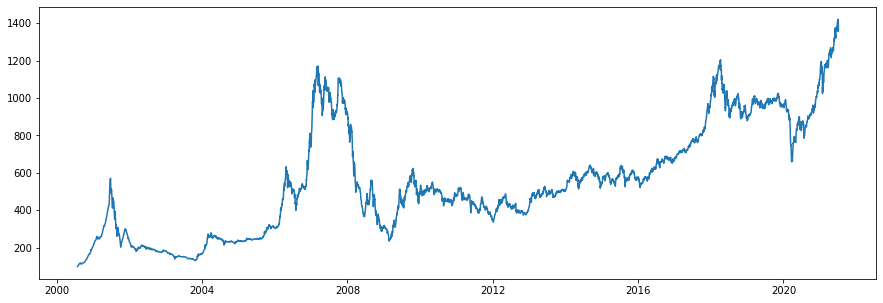

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df.Close)
plt.show()

# Chuẩn hóa chuỗi thời gian

In [ ]:
from sklearn.preprocessing import StandardScaler

## Tạo mới một DataFrame chỉ gồm Close đồng thời trích lọc dữ liệu chỉ từ ngày 01/01/2020

In [ ]:
close_data = df['2010-01-01':][['Close']].copy()

In [ ]:
close_data.head()

,Close
Date,
2010-01-04,517.05
2010-01-05,532.53
2010-01-06,534.46
2010-01-07,533.34
2010-01-08,520.90


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit_transform(close_data[['Close']])

array([[-0.70073164],
       [-0.63620463],
       [-0.6281596 ],
       ...,
       [ 3.02616199],
       [ 2.79131366],
       [ 2.93203925]])

## Tạo cột dữ liệu ngày $t$

In [ ]:
close_data[['Close_t']] = scaler.fit_transform(close_data[['Close']])

In [ ]:
close_data.head()

,Close,Close_t
Date,,
2010-01-04,517.05,-0.700732
2010-01-05,532.53,-0.636205
2010-01-06,534.46,-0.628160
2010-01-07,533.34,-0.632828
2010-01-08,520.90,-0.684683


## Tạo cột dữ liệu cho ngày $t-1$

In [ ]:

close_data['Close_t1'] = close_data['Close_t'].shift(1)

In [ ]:
close_data.head()

,Close,Close_t,Close_t1
Date,,,
2010-01-04,517.05,-0.700732,NaN
2010-01-05,532.53,-0.636205,-0.700732
2010-01-06,534.46,-0.628160,-0.636205
2010-01-07,533.34,-0.632828,-0.628160
2010-01-08,520.90,-0.684683,-0.632828


## Tạo cột dữ liệu cho ngày $t-2$ và $t-3$

In [ ]:
close_data['Close_t2'] = close_data.Close_t.shift(2)
close_data['Close_t3'] = close_data.Close_t.shift(3)

In [ ]:
close_data.head()

,Close,Close_t,Close_t1,Close_t2,Close_t3
Date,,,,,
2010-01-04,517.05,-0.700732,NaN,NaN,NaN
2010-01-05,532.53,-0.636205,-0.700732,NaN,NaN
2010-01-06,534.46,-0.628160,-0.636205,-0.700732,NaN
2010-01-07,533.34,-0.632828,-0.628160,-0.636205,-0.700732
2010-01-08,520.90,-0.684683,-0.632828,-0.628160,-0.636205


## Xóa những dòng có giá trị NaN

In [ ]:
close_data.dropna(inplace=True)

In [ ]:
close_data.head()

,Close,Close_t,Close_t1,Close_t2,Close_t3
Date,,,,,
2010-01-07,533.34,-0.632828,-0.628160,-0.636205,-0.700732
2010-01-08,520.90,-0.684683,-0.632828,-0.628160,-0.636205
2010-01-11,515.06,-0.709027,-0.684683,-0.632828,-0.628160
2010-01-12,498.31,-0.778848,-0.709027,-0.684683,-0.632828
2010-01-13,508.61,-0.735913,-0.778848,-0.709027,-0.684683


# Tạo dữ liệu huấn luyện

In [ ]:
from sklearn.model_selection import train_test_split

Dự báo ngày $t$ dựa vào ngày $t-1$, $t-2$, $t-3$

In [ ]:
features = ['Close_t1', 'Close_t2', 'Close_t3']
target = 'Close_t'

In [ ]:
X = close_data[features]
y = close_data[target]

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, 
                                                    shuffle=False)

In [ ]:
train_X.head()

,Close_t1,Close_t2,Close_t3
Date,,,
2010-01-07,-0.628160,-0.636205,-0.700732
2010-01-08,-0.632828,-0.628160,-0.636205
2010-01-11,-0.684683,-0.632828,-0.628160
2010-01-12,-0.709027,-0.684683,-0.632828
2010-01-13,-0.778848,-0.709027,-0.684683


# Dự báo chuỗi thời gian với Neural Network (dùng TensorFlow)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GRU, Dense, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model = Sequential()
model.add(Input(3))
model.add(Dense(units=64))
model.add(Dense(1))
model.compile( loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Cần biến đổi để dữ liệu về dạng ma trận/tensor khi dùng với Tensorflow
X_train = train_X.to_numpy()
y_train = train_y.to_numpy()

In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, verbose=False)

In [ ]:
ann_train_y_pred = model.predict(X_train)

63/63 [==============================] - 0s 1ms/step


In [ ]:
ann_train_y_pred[:10]

array([[-0.60759205],
       [-0.61368316],
       [-0.6644303 ],
       [-0.68980145],
       [-0.75698596],
       [-0.71711755],
       [-0.6985149 ],
       [-0.7271525 ],
       [-0.8026598 ],
       [-0.77066576]], dtype=float32)

In [ ]:
mae = mean_absolute_error(y_train, ann_train_y_pred.ravel()).numpy()

In [ ]:
mae

0.024912085

In [ ]:
X_test = test_X.to_numpy()
y_test = test_y.to_numpy()

In [ ]:
ann_test_y_pred = model.predict(X_test)

27/27 [==============================] - 0s 1ms/step


In [ ]:
mean_absolute_error(y_test, ann_test_y_pred.ravel()).numpy()

0.044304494

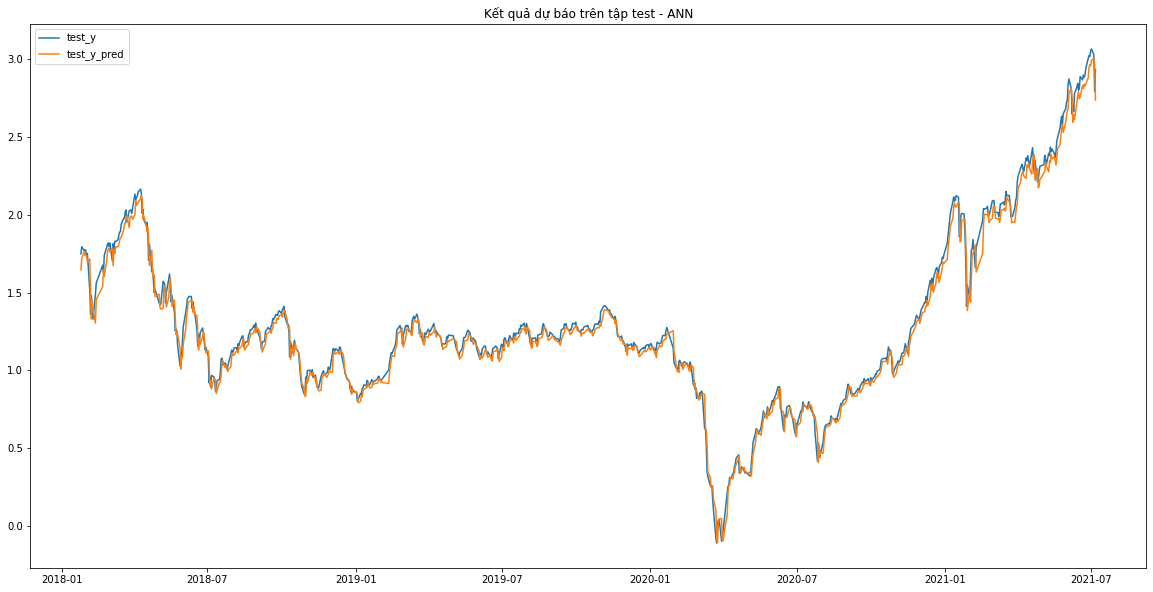

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(test_y, label = 'test_y')
plt.plot(test_y.index, ann_test_y_pred, label = 'test_y_pred')
plt.title('Kết quả dự báo trên tập test - ANN')
plt.legend()
plt.show()

In [ ]:
import plotly.express as xp
import plotly.graph_objects as go

In [ ]:
close_data['Close_pred'] = np.concatenate((ann_train_y_pred, ann_test_y_pred))
train_size = 0.7
n_train = int(close_data.shape[0]*train_size) # số lượng mẫu huấn luyện

In [ ]:
close_go = go.Scatter(x=close_data.index, y=close_data.Close_t, name='close')
train_go = go.Scatter(x=close_data.index, y=close_data['Close_pred'].iloc[:n_train + 1], name='train pred', line = dict(dash='dot'))
test_go = go.Scatter(x=close_data.index[n_train:], y=close_data['Close_pred'].iloc[n_train:], name='test pred', line = dict(dash='dot'))
fig = go.Figure(data=[close_go, train_go, test_go])
fig.show()

In [ ]:
!pip3 install keras-visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_visualizer import visualizer  

In [ ]:
visualizer(model, filename='model1', format='png', view=False)

(/content/model1.png")